# Activity 11: Retrieving Data Correctly From Databases
In this activity, we have the persons table:

| id | first_name | last_name | age |       city |  zipcode |
|---:|-----------:|----------:|----:|-----------:|---------:|
|  1 |      Erica |       NaN |  22 | south port |  2345678 |
|  2 |      Jordi |       NaN |  73 |  east port |   123456 |
|  3 |    Chasity |       NaN |  70 |   new port | 76856785 |
|  4 |      Gregg |       NaN |  31 |   new port | 76856785 |
|  5 |       Tony |  Lindgren |   7 |  west port |  2345678 |

We have the pets table:

| owner_id | pet_name | pet_type | treatment_done |
|---------:|---------:|---------:|---------------:|
|       57 |     mani |      1.0 |              0 |
|       80 |   tamari |      NaN |              0 |
|       25 |     raba |      NaN |              0 |
|       27 |     olga |      NaN |              0 |
|       60 |     raba |      NaN |              0 |

As we can see, the **id** column in the persions table (which is an integer) serves as the primary key for that table and as a foreign key for the pet table, which is linked via the **owner_id** column.

The persons table has the following columns:

- **first_name**: The first name of the person
- **last_name**: The last name of the persion (can be "null")
- **age**: THe age of the person
- **city**: The city from where he/she is from
- **zip_code**: The zipcode of the city

The pets table has the following columns:
- **pet_name**: The name of the pet.
- **pet_type**: WHat type of pet it is, for example, cat, dog, and so on, Due to the lack of futher information, we do not know which number represents what, but it is an integer and can be null.
- **treatment_done**: It is also an integer column, and 0 here represents "No", whereas 1 represents "Yes".

THe name of the SQLite DB is **petsdb** and it is supplied along with the Activity notebook. These steps will help you complete the activity:

### 1) Connect to **petsdb** and check whether the connections have been successful

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect("petsdb")
c = conn.cursor()

if c:
    print("Connected")

Connected


### 2) Find the different age groups in the persons database

In [2]:
df = c.execute("SELECT age, count(*) FROM persons GROUP BY age")
df = pd.DataFrame(df, columns = ['age','count'])
df

,age,count
0,5,2
1,6,1
2,7,1
3,8,3
4,9,1
5,11,2
6,12,3
7,13,1
8,14,4
9,16,2


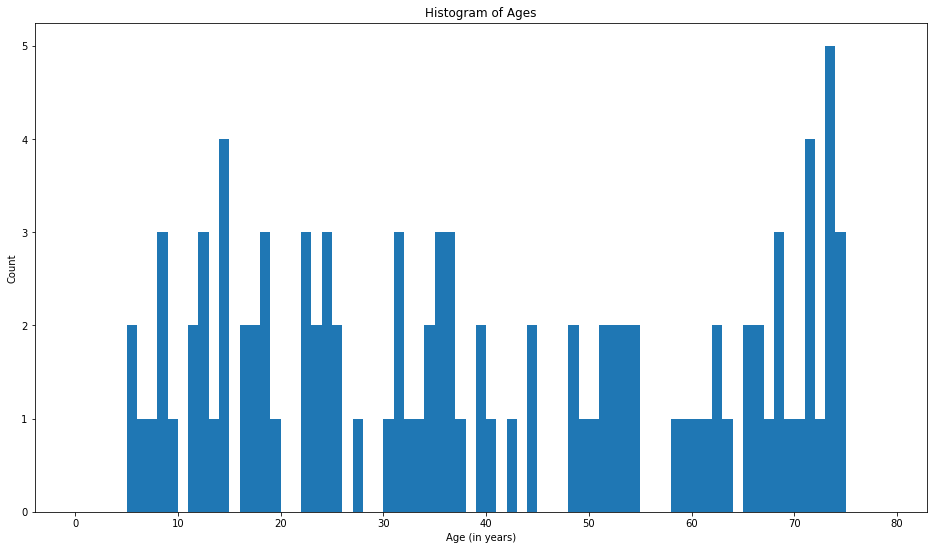

In [3]:
plt.figure(figsize=(16,9))
plt.hist(pd.DataFrame(c.execute("SELECT age FROM persons")), bins = np.arange(0,80));
plt.title("Histogram of Ages")
plt.xlabel("Age (in years)")
plt.ylabel("Count")
plt.show()

### 3) Find the age group that has the maximum number of people

In [4]:
df = c.execute("SELECT age, count(*) FROM persons \
                GROUP BY age \
                ORDER BY count(*)")
df = pd.DataFrame(df, columns = ['age','count'])
df.tail(1)

,age,count
52,73,5


### 4) Find the people who do not has a last name

In [5]:
# Finding the entries with no last name
pd.DataFrame(c.execute("SELECT * FROM persons WHERE last_name IS null"), 
             columns= list(map(lambda x: x[0], c.description)))

,id,first_name,last_name,age,city,zip_code
0,1,Erica,None,22,south port,2345678
1,2,Jordi,None,73,east port,123456
2,3,Chasity,None,70,new port,76856785
3,4,Gregg,None,31,new port,76856785
4,6,Cary,None,73,new port,76856785
5,8,Francisca,None,14,west port,123456
6,10,Raleigh,None,68,new port,2345678
7,11,Maria,None,42,west port,123456
8,12,Mariane,None,62,south port,9756543
9,13,Mona,None,44,south port,76856785


In [6]:
# Finding the numnber of entries where last_name == NaN

num = c.execute("SELECT count(*) FROM persons \
                WHERE last_name IS null")

print(f"There are {pd.DataFrame(num).values[0][0]} entries with no last name")

There are 60 entries with no last name


### 5) Find out how many people have more than one pet

In [7]:
# Grouping the owner_ids together, finding the counts larger than 1, returning those values, and then counting those values

num = pd.DataFrame(c.execute("SELECT count(*) FROM \
                             (SELECT count(owner_id) FROM pets \
                             GROUP BY owner_id \
                             HAVING count(owner_id) > 1)"))

print(f"There are {pd.DataFrame(num).values[0][0]} people with more than one pet")

There are 43 people with more than one pet


### 6) Find out how many pets have received treatment.

In [8]:
# Finding the count of pets where treatment_done == 1
num = c.execute("SELECT count(*) FROM pets \
                WHERE treatment_done = 1")

print(f"There are {pd.DataFrame(num).values[0][0]} pets that have received treatment")

There are 36 pets that have received treatment


### 7) FInd out how many pets have received treatment and the type of pet is known

In [9]:
# Finding the count of pets where treatment_done == 1 and pet_type is NOT null
num = c.execute("SELECT count(*) FROM pets \
                WHERE treatment_done = 1 AND \
                pet_type IS NOT null ")

print(f"There are {pd.DataFrame(num).values[0][0]} pets that have received treatment and the pet type is known")

There are 16 pets that have received treatment and the pet type is known


### 8) Find out how many pets are from the city called east port

In [10]:
# Merge the persons table with the pets table based on ip and owner_id and return the count of values where city == 'east port'
num = c.execute("SELECT count(*) FROM persons \
                JOIN pets ON persons.id = pets.owner_id \
                WHERE persons.city = 'east port'")

In [11]:
print(f"There are {pd.DataFrame(num).values[0][0]} pets that live in East Port")

There are 49 pets that live in East Port


### 9) Find out how many pets are from the city called **east port** and who recieved treatment

In [12]:
# Same as above, but adding AND treatment_done == 1
num = c.execute("SELECT count(*) FROM persons \
                JOIN pets ON persons.id = pets.owner_id \
                WHERE persons.city = 'east port' AND \
                pets.treatment_done = 1")

In [13]:
print(f"There are {pd.DataFrame(num).values[0][0]} pets that live in East Port that received treatment.")

There are 11 pets that live in East Port that received treatment.
